In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install --upgrade pandas seaborn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [8]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Customer_Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> > 1. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


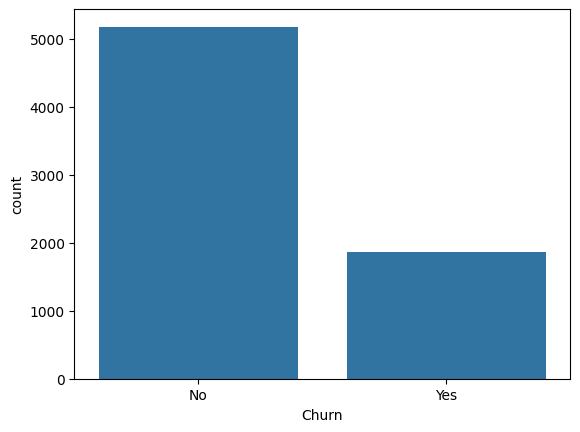

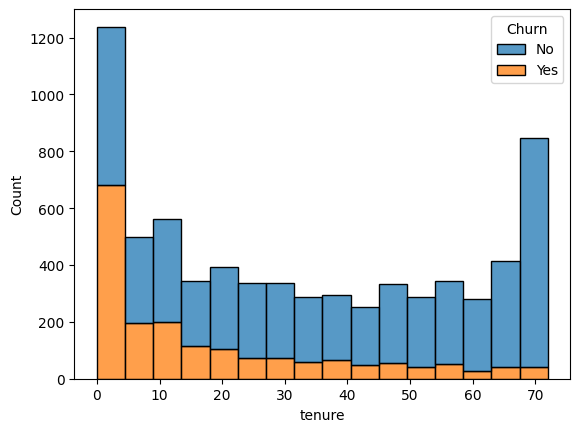

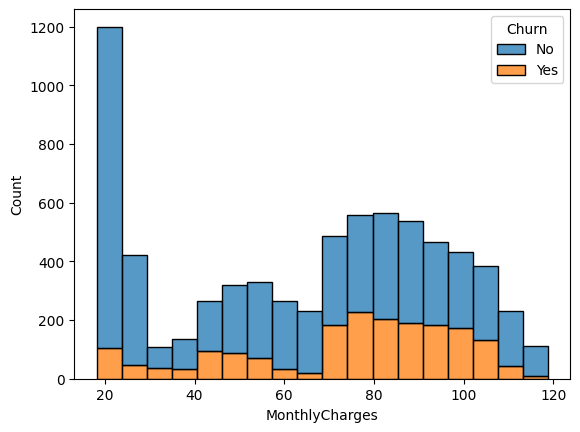

In [9]:
print(df.info())
print(df.head())

print(df.describe())

sns.countplot(x='Churn', data=df)
plt.show()

sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.show()

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.show()

> > 2. Feature Engineering


In [10]:
services_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServices'] = df[services_columns].apply(lambda x: x == 'Yes').sum(axis=1)


> > 3. Data Preprocessing

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = [col for col in X.columns if col not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


> > 4. Machine Learning Model Development

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_prepared, y_train)

y_pred = rf_model.predict(X_test_prepared)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7970191625266146
Precision: 0.6641509433962264
Recall: 0.4718498659517426
F1 Score: 0.5517241379310344
ROC AUC Score: 0.6929712650222033


> > 5. Model Evaluation

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'TotalServices']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

>>6. Predicting Churn

In [14]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_

features = numeric_features + \
           list(preprocessor.named_transformers_['cat'].get_feature_names_out())

sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature importances:")
for i in sorted_indices:
    print(f"{features[i]}: {feature_importances[i]}")


Feature importances:
TotalCharges: 0.15682002245264257
tenure: 0.1339519655141567
MonthlyCharges: 0.1294816386887354
Contract_Month-to-month: 0.05491006353353009
TotalServices: 0.030287434739737294
PaymentMethod_Electronic check: 0.027496374496386956
TechSupport_No: 0.026834505741343998
OnlineSecurity_No: 0.026703678582681713
InternetService_Fiber optic: 0.026023192122856663
gender_Male: 0.018104305678434813
gender_Female: 0.017708370973711928
Contract_Two year: 0.016626566355237158
OnlineBackup_No: 0.016001434045687723
Partner_No: 0.014759197284418187
PaperlessBilling_No: 0.014677874226417231
PaperlessBilling_Yes: 0.0146187597411247
Partner_Yes: 0.014576707357310608
DeviceProtection_No: 0.014540334657952916
MultipleLines_No: 0.013229942799329016
OnlineSecurity_Yes: 0.013172294426308547
MultipleLines_Yes: 0.013070763084538575
SeniorCitizen_0: 0.012591633202675978
SeniorCitizen_1: 0.012373482064118944
PaymentMethod_Bank transfer (automatic): 0.012257401341560024
Dependents_No: 0.0121689

In [15]:
importances = sorted(list(zip(features, feature_importances)), key=lambda x: x[1], reverse=True)

print("Top 5 Feature Importances")
for feature, importance in importances[:5]:
    print(f"{feature}: {importance}")


Top 5 Feature Importances
TotalCharges: 0.15682002245264257
tenure: 0.1339519655141567
MonthlyCharges: 0.1294816386887354
Contract_Month-to-month: 0.05491006353353009
TotalServices: 0.030287434739737294


In [16]:
def targeted_intervention(customers, feature, threshold, intervention):
    targeted_customers = customers[customers[feature] > threshold]
    print(f"Applying '{intervention}' to {len(targeted_customers)} customers with {feature} > {threshold}")


customers_df = df
targeted_intervention(customers_df, 'MonthlyCharges', 70, 'offer discount')
targeted_intervention(customers_df, 'tenure', 3, 'send welcome package')


Applying 'offer discount' to 3583 customers with MonthlyCharges > 70
Applying 'send welcome package' to 5981 customers with tenure > 3
